# Logit Model for credit Card Fraud Detection

One of the main problem in economic and financial modelling is related to the interpretability of results. For this reason, it's necessary looking for a trade off between flexibility and interpretability of the models.
Flexible methods like Neural Networks and SVM provides an high accuracy but they are in fact "black boxes".
So, in this case i used a logit model 


In [1]:
system("ls ../input", intern=TRUE)

[1] "creditcard.csv"

In [2]:
library(readr)
library(caTools)
library(pROC)
library(ggplot2)
library(questionr)

Type 'citation("pROC")' for a citation.

Attaching package: ‘pROC’

The following objects are masked from ‘package:stats’:

    cov, smooth, var



In [3]:
creditcard <- read_csv("../input/creditcard.csv")
str(creditcard)
attach(creditcard)

Parsed with column specification:
cols(
  .default = col_double()
)
See spec(...) for full column specifications.


Classes ‘tbl_df’, ‘tbl’ and 'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115

In [4]:
summary(creditcard)

      Time              V1                  V2                  V3          
 Min.   :     0   Min.   :-56.40751   Min.   :-72.71573   Min.   :-48.3256  
 1st Qu.: 54202   1st Qu.: -0.92037   1st Qu.: -0.59855   1st Qu.: -0.8904  
 Median : 84692   Median :  0.01811   Median :  0.06549   Median :  0.1799  
 Mean   : 94814   Mean   :  0.00000   Mean   :  0.00000   Mean   :  0.0000  
 3rd Qu.:139320   3rd Qu.:  1.31564   3rd Qu.:  0.80372   3rd Qu.:  1.0272  
 Max.   :172792   Max.   :  2.45493   Max.   : 22.05773   Max.   :  9.3826  
       V4                 V5                   V6                 V7          
 Min.   :-5.68317   Min.   :-113.74331   Min.   :-26.1605   Min.   :-43.5572  
 1st Qu.:-0.84864   1st Qu.:  -0.69160   1st Qu.: -0.7683   1st Qu.: -0.5541  
 Median :-0.01985   Median :  -0.05434   Median : -0.2742   Median :  0.0401  
 Mean   : 0.00000   Mean   :   0.00000   Mean   :  0.0000   Mean   :  0.0000  
 3rd Qu.: 0.74334   3rd Qu.:   0.61193   3rd Qu.:  0.3986   3rd Qu

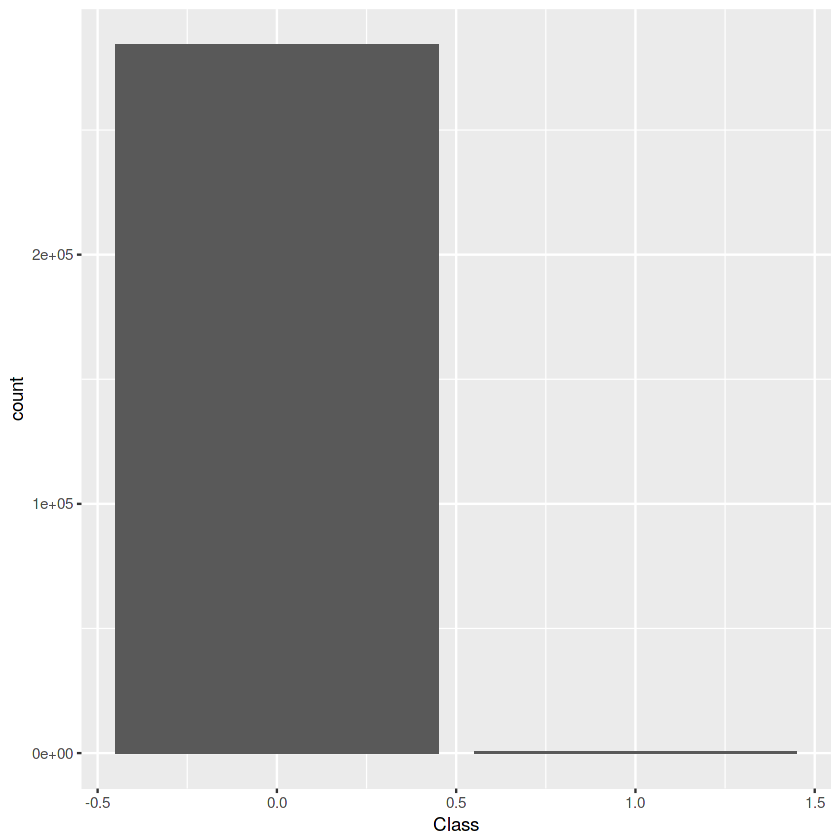

In [5]:
ggplot(creditcard, aes(Class))+geom_bar()

In [6]:
Class<-as.factor(creditcard$Class)
creditcard <- creditcard[, !(names(creditcard) == "Time")]

In [7]:
split<-sample.split(Class, SplitRatio = 0.6)
test<-subset(creditcard, split==T)
train<-subset(creditcard, split==F)

In [8]:
table(train$Class)
table(test$Class)



     0      1 
113726    197 


     0      1 
170589    295 

**Logit Model**

In [9]:
model1<-glm(train$Class~.,data = train, family = binomial(link="logit"))
model2<-glm(test$Class~.,data = test, family = binomial(link = "logit"))

In [10]:
summary(model1)
summary(model2)


Call:
glm(formula = train$Class ~ ., family = binomial(link = "logit"), 
    data = train)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.8855  -0.0282  -0.0184  -0.0120   4.5976  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.8379657  0.2372106 -37.258  < 2e-16 ***
V1           0.1003517  0.0651316   1.541 0.123377    
V2          -0.0775914  0.0720148  -1.077 0.281285    
V3           0.0443935  0.0740914   0.599 0.549058    
V4           0.5940690  0.1020998   5.819 5.94e-09 ***
V5           0.0218023  0.0985279   0.221 0.824874    
V6          -0.1204767  0.1226390  -0.982 0.325918    
V7          -0.1088112  0.0954910  -1.139 0.254498    
V8          -0.1858695  0.0602334  -3.086 0.002030 ** 
V9          -0.4815315  0.1680073  -2.866 0.004155 ** 
V10         -0.7239234  0.1429080  -5.066 4.07e-07 ***
V11          0.0517468  0.1267426   0.408 0.683066    
V12          0.1165369  0.1304013   0.894 0.371494    
V13      


Call:
glm(formula = test$Class ~ ., family = binomial(link = "logit"), 
    data = test)

Deviance Residuals: 
    Min       1Q   Median       3Q      Max  
-4.8383  -0.0297  -0.0189  -0.0111   4.4552  

Coefficients:
              Estimate Std. Error z value Pr(>|z|)    
(Intercept) -8.9264609  0.2409154 -37.052  < 2e-16 ***
V1           0.0648790  0.0574948   1.128 0.259137    
V2           0.1632738  0.1082961   1.508 0.131641    
V3           0.0432813  0.0610691   0.709 0.478494    
V4           0.8451853  0.1325048   6.379 1.79e-10 ***
V5           0.2087404  0.1026403   2.034 0.041981 *  
V6          -0.1527833  0.0990922  -1.542 0.123115    
V7          -0.0764858  0.1074365  -0.712 0.476516    
V8          -0.1636509  0.0406872  -4.022 5.77e-05 ***
V9           0.0021153  0.1801798   0.012 0.990633    
V10         -0.8668303  0.1547542  -5.601 2.13e-08 ***
V11         -0.0357260  0.0958576  -0.373 0.709373    
V12          0.0972974  0.1360731   0.715 0.474586    
V13        

**Goodness of Fit**

In [11]:
deltaDmodel1= abs(model1$null.deviance-model1$deviance)

pvaluemodel1= pchisq(deltaDmodel1, df=abs(model1$.residual-model1$df.null))

pseudoR2model1=1-deviance(model1)/model1$null.deviance


deltaDmodel2= abs(model2$null.deviance-model2$deviance)

pvaluemodel2=pchisq(deltaDmodel2, df=abs(model2$.residual-model2$df.null), lower.tail=FALSE)

pseudoR2model2=1-deviance(model2)/model2$null.deviance

cbind(deltaDmodel1,deltaDmodel2, pvaluemodel1, pvaluemodel2, pseudoR2model1, pseudoR2model2)


deltaDmodel1,deltaDmodel2,pseudoR2model1,pseudoR2model2
2061.743,2978.495,0.7110615,0.6858259


Predict

In [12]:
predModel1=as.vector(predict(model1, type=c("response")))
predModel2=as.vector(predict(model2, type=c("response")))

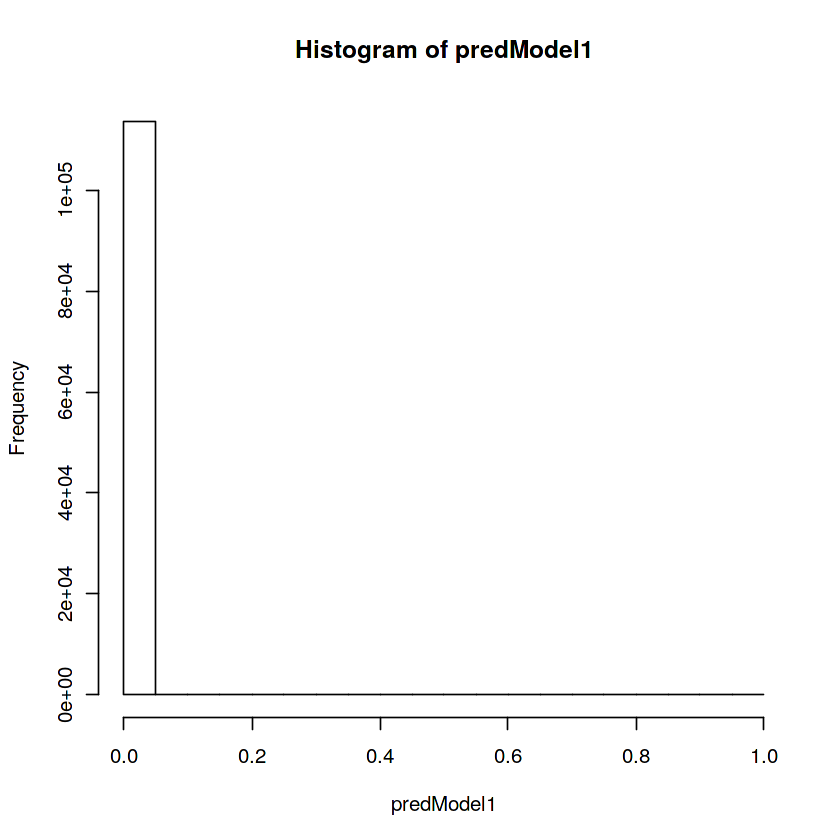

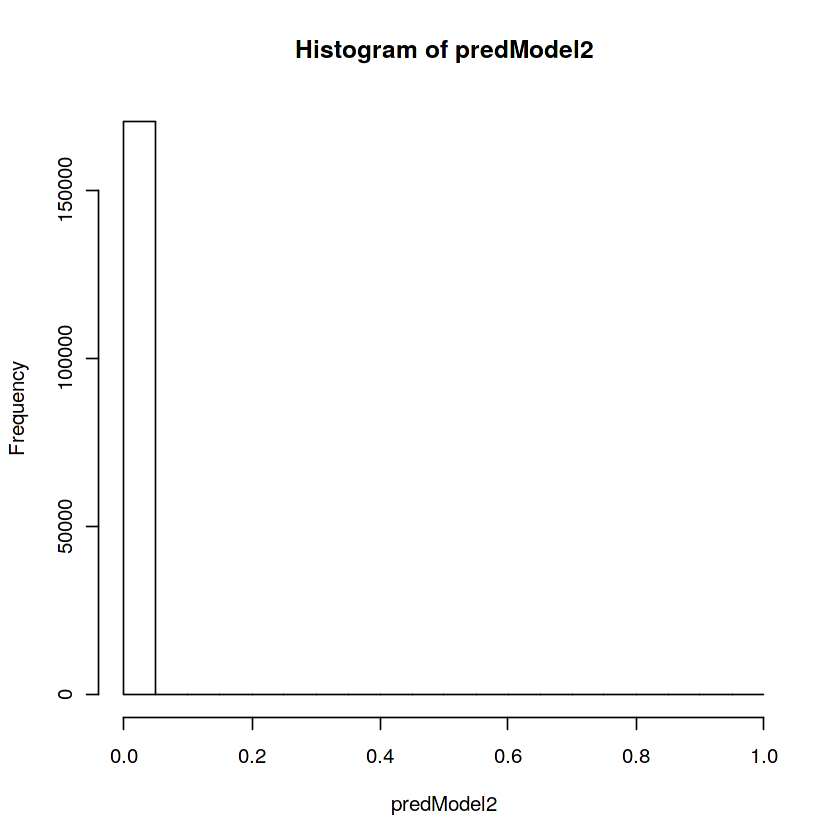

In [13]:
hist(predModel1)
hist(predModel2)

Confusion Matrix

In [14]:
classModel1=1*(predModel1>0.50)
classModel2=1*(predModel2>0.50)

In [15]:
table(classModel1, train$Class)
table(classModel2, test$Class)

           
classModel1      0      1
          0 113710     66
          1     16    131

           
classModel2      0      1
          0 170563    116
          1     26    179

In [16]:
a=table(classModel1, train$Class)
b=table(classModel2, test$Class)

In [17]:
accuracyTrain=(a[1,1]+ a[2,2])/length(train$Class)
accuracyTest= (b[1,1]+b[2,2])/length(test$Class)

In [18]:
ErrorTrain= 1-accuracyTrain
ErrorTest= 1-accuracyTest

In [19]:
cbind(accuracyTest, accuracyTrain, ErrorTest, ErrorTrain)

accuracyTest,accuracyTrain,ErrorTest,ErrorTrain
0.999169,0.9992802,0.0008309731,0.0007197844


ROC curve

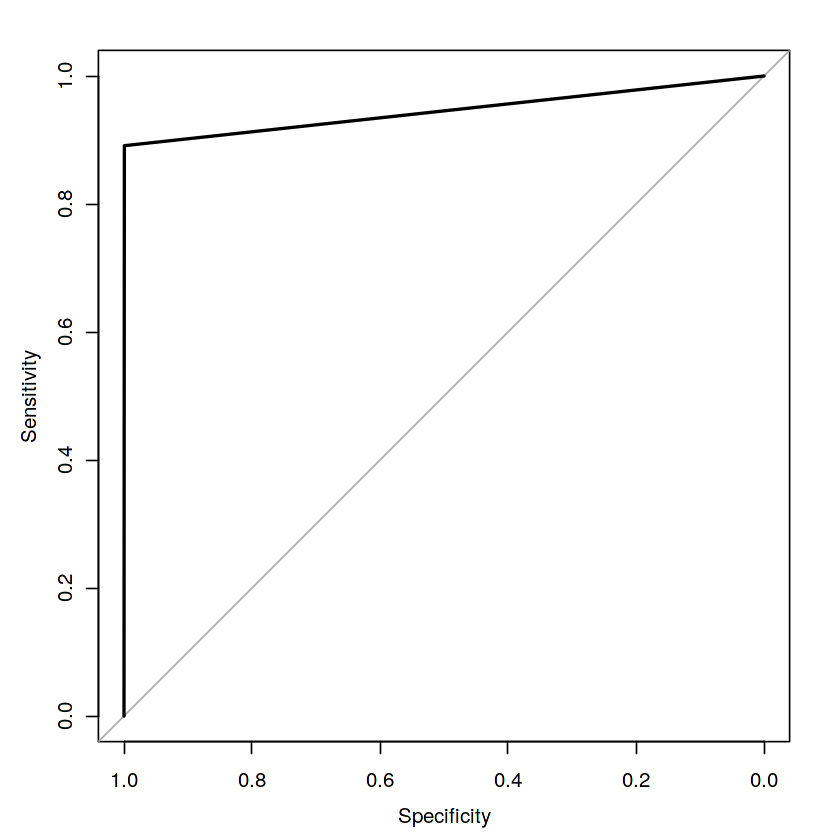

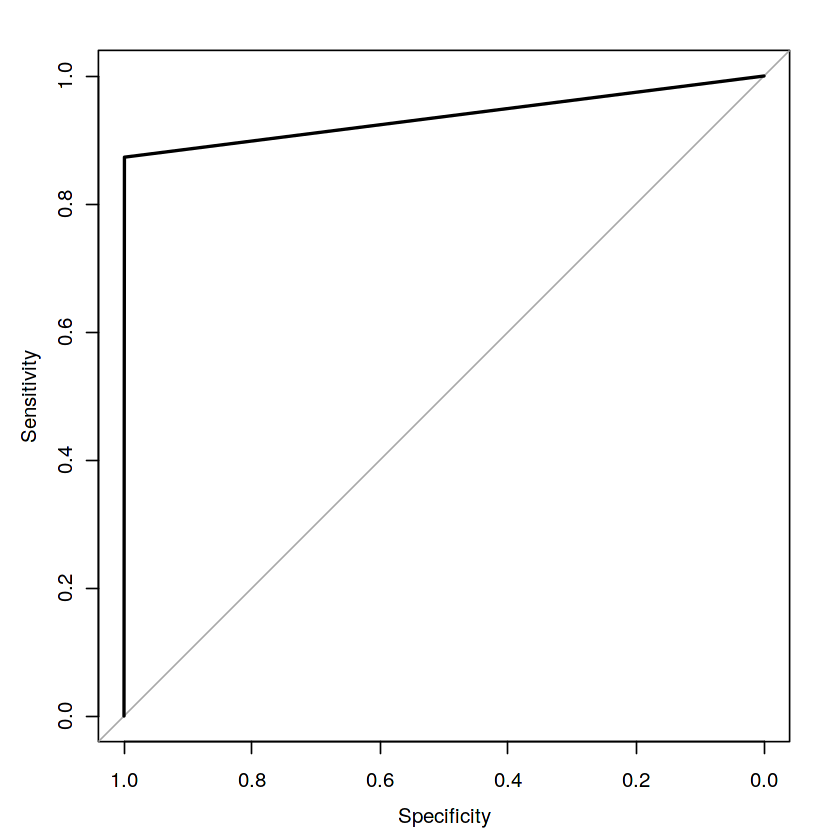

In [20]:
plot.roc(classModel1, train$Class)
plot.roc(classModel2, test$Class)